# 03. Pytorch Machine Vision Class

In [35]:
import requests
from pathlib import Path
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd
import torch
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn
from torchmetrics import Accuracy
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm

In [4]:
# Import torch
# import torch

# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Setup random seed
RANDOM_SEED = 42

## get data set

In [5]:
# # set up trainng dta
train_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None

    )
# set up test dta
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None

    )

In [6]:
print(len (train_data), len(test_data))
image, label = train_data[0]
print (image, label)
print (train_data.classes)
print (train_data.class_to_idx)

60000 10000
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0

In [7]:
print(image.shape)
print (train_data.classes[label])

torch.Size([1, 28, 28])
Ankle boot


## visualize

Text(0.5, 1.0, '9')

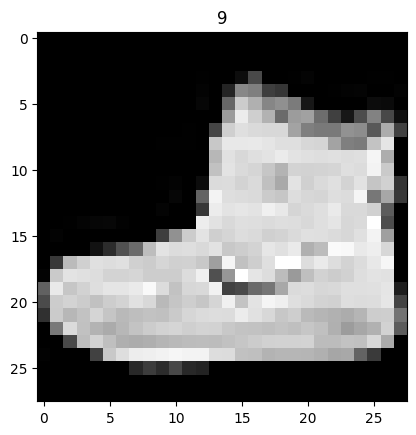

In [8]:
plt.imshow(image.squeeze(), cmap="grey")
plt.title(label)

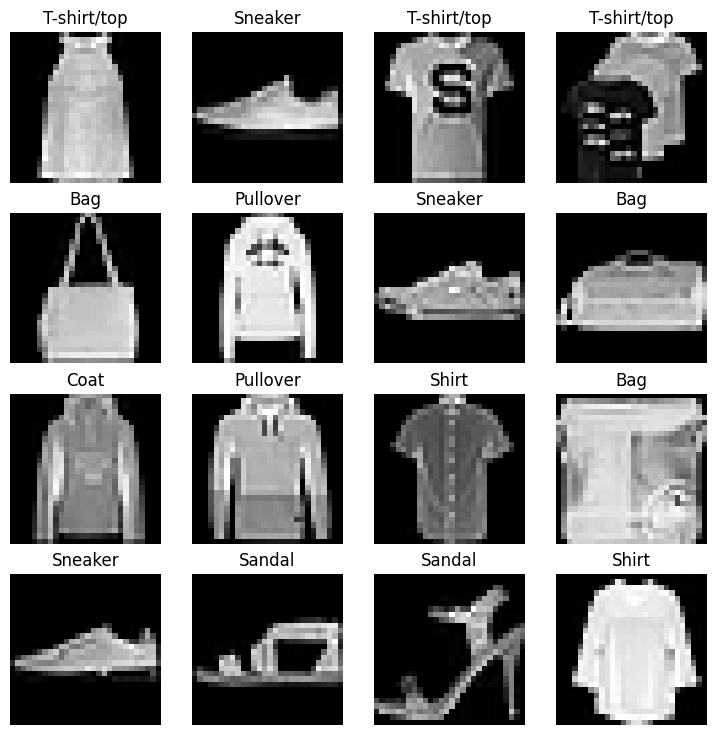

In [9]:
# Show 16 pictures
fig = plt.figure (figsize=(9,9))
rows, cols = 4, 4
for i in range (1, rows*cols + 1):
    img_index = torch.randint(0, len(train_data), size = [1]).item()
    fig.add_subplot (rows, cols, i)
    img, lbl = train_data[img_index]
    plt.imshow(img.squeeze(), cmap = 'grey')
    plt.title(train_data.classes[lbl])
    plt.axis(False)


In [10]:
# turn data into iterable 

In [11]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset= train_data,
                              batch_size= BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)
print(train_dataloader, test_dataloader)
print (len(train_dataloader), BATCH_SIZE)
print (len (test_dataloader), BATCH_SIZE)


<torch.utils.data.dataloader.DataLoader object at 0x000001AC92E5C210> <torch.utils.data.dataloader.DataLoader object at 0x000001AC92E0C9D0>
1875 32
313 32


In [12]:
# show each batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(9) torch.Size([])


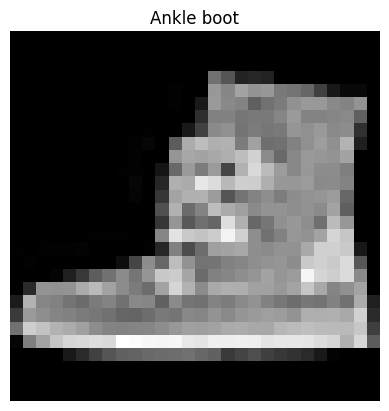

In [13]:
# show sample of 
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'grey')
plt.title (train_data.classes[label])
plt.axis(False)
print (img.shape)
print (label, label.shape)

## Baseline Model

In [14]:
# flatten data
flatten_data = nn.Flatten()
x_0 = train_features_batch[0]
x_0_flatten = flatten_data(x_0)
x_0.shape, x_0_flatten.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [18]:
# first model
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int = 784,
                 hidden_units: int = 256,
                 output_shape: int =10):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
# set model
torch.manual_seed(42)
model_0 = FashionMNISTModelV0()
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [24]:
dummy_x = torch.rand([1,1, 28, 28])
model_0(dummy_x)


tensor([[-0.2170, -0.0242, -0.1070,  0.4912,  0.1688, -0.0232,  0.1566, -0.1355,
          0.0843,  0.2147]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

In [26]:
# loss functions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                                                      lr = 0.1)


In [28]:
# time functions
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print (f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [31]:
start_time = timer() 
end_time = timer ()

print_train_time(start_time, end_time, device = 'cpu')

Train time on cpu: 0.000 seconds


3.2999996619764715e-05

## use data loader for training


In [39]:
# loop for batch
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print (f"Epoch {epoch}\n")
    train_loss = 0
    for batch, (X, y) in enumerate (train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn (y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 ==0:
            print (f'Batch Number  {batch * len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0 (X_test)
            test_loss  += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true = y_test, y_pred=test_pred.argmax(dim = 1)) 

        test_loss /= len(test_dataloader)
        test_acc /= len (test_dataloader)

    print (f"\nTrain loss: {train_loss:.4f}| test loss: {test_loss:.4f} , Test acc {test_acc:4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu, 
                                            end = train_time_end_on_cpu,
                                            device = str(next (model_0.parameters()).device))








  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0

Batch Number  0/60000 samples
Batch Number  12800/60000 samples
Batch Number  25600/60000 samples
Batch Number  38400/60000 samples
Batch Number  51200/60000 samples


 33%|███▎      | 1/3 [00:09<00:19,  9.54s/it]


Train loss: 0.4263| test loss: 0.4579 , Test acc 84.025559
Epoch 1

Batch Number  0/60000 samples
Batch Number  12800/60000 samples
Batch Number  25600/60000 samples
Batch Number  38400/60000 samples
Batch Number  51200/60000 samples


 67%|██████▋   | 2/3 [00:18<00:09,  9.25s/it]


Train loss: 0.4234| test loss: 0.4594 , Test acc 84.215256
Epoch 2

Batch Number  0/60000 samples
Batch Number  12800/60000 samples
Batch Number  25600/60000 samples
Batch Number  38400/60000 samples
Batch Number  51200/60000 samples


100%|██████████| 3/3 [00:27<00:00,  9.21s/it]


Train loss: 0.4196| test loss: 0.4625 , Test acc 84.045527
Train time on cpu: 27.645 seconds


In [ ]:
import torch.utils
import torch.utils.data


torch.manual_seet(42)
def eval_model (model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                accuracy_fn):
    loss, acc = 0,0
    